<a href="https://colab.research.google.com/github/beratcmn/tensorflow-quickdraw-recognition/blob/main/doodle_identification_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading the libraries

In [54]:
!pip install quickdraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the libraries

In [130]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

import numpy as np
from pathlib import Path
from quickdraw import QuickDrawDataGroup
from matplotlib import pyplot as plt
from PIL import Image

tf.__version__

'2.11.0'

### Getting the doodles

In [57]:
image_size = (64, 64)
categories = ["airplane", "apple", "bicycle", "car", "cat", "cloud", "dog", "hamburger", "fish", "flower", "banana", "bird", "eye", "fork", "hat"]
max_drawings = 5000

def generate_class_images(name, max_drawings, recognized):
    directory = Path("data/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

for label in categories:
    generate_class_images(label, max_drawings=max_drawings, recognized=True)

loading airplane drawings
load complete
loading apple drawings
load complete
loading bicycle drawings
load complete
loading car drawings
load complete
loading cat drawings
load complete
loading cloud drawings
load complete
loading dog drawings
load complete
loading hamburger drawings
load complete
loading fish drawings
load complete
loading flower drawings
load complete
loading banana drawings
load complete
loading bird drawings
load complete
loading eye drawings
load complete
loading fork drawings
load complete
loading hat drawings
load complete


### Creating the Datasets

In [4]:
batch_size = 32

train_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

validation_dataset = image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

Found 75000 files belonging to 15 classes.
Using 60000 files for training.
Found 75000 files belonging to 15 classes.
Using 15000 files for validation.


### Showing the data

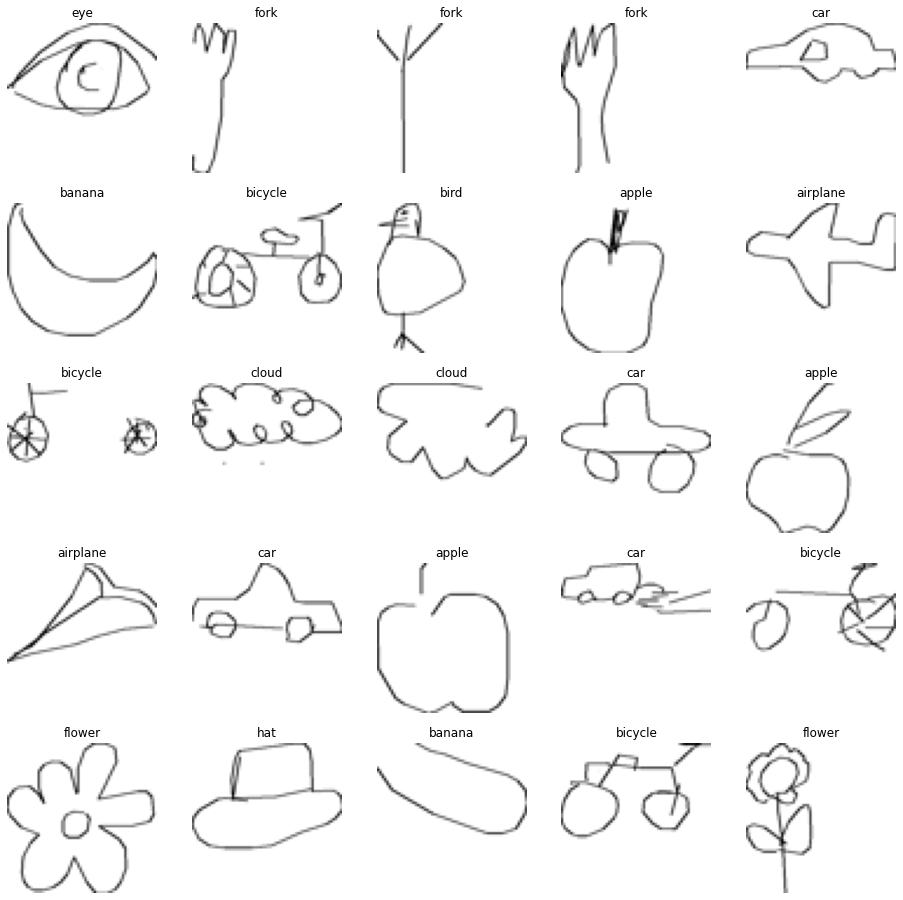

In [5]:
plt.figure(figsize=(16, 16))
for images, labels in train_dataset.take(1):
  for i in range(25):
    plt.subplot(5,5,i+1)
    data = images[i].numpy().astype("uint8")
    plt.imshow(data, cmap='gray', vmin=0, vmax=255)
    plt.title(train_dataset.class_names[labels[i]])
    plt.axis("off")

### Creating the model

In [6]:
model_3 = tf.keras.Sequential([
    Rescaling(1. / 255, input_shape=(64, 64, 1)),
    BatchNormalization(),

    Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(700, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(400, activation="relu"),
    Dropout(0.2),

    Dense(len(categories), activation="softmax")
])

In [7]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 6)         60        
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         440       
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 10)        730       
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 10)       40        
 hNormalization)                                        

### Compiling the model

In [8]:
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 32

model_3.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = epochs
)

model_3.save("./models/test_model_3")

Epoch 1/32


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 40s 14ms/step - loss: 0.6562 - accuracy: 0.8022 - val_loss: 0.4003 - val_accuracy: 0.8843
Epoch 2/32
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3480 - accuracy: 0.8930 - val_loss: 0.3380 - val_accuracy: 0.9002
Epoch 3/32
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2584 - accuracy: 0.9193 - val_loss: 0.4233 - val_accuracy: 0.8832
Epoch 4/32
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1914 - accuracy: 0.9392 - val_loss: 0.4164 - val_accuracy: 0.8935
Epoch 5/32
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1526 - accuracy: 0.9515 - val_loss: 0.4808 - val_accuracy: 0.8814
Epoch 6/32
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1278 - accuracy: 0.9593 - val_loss: 0.4369 - val_accuracy: 0.8971
Epoch 7/32
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1099 - accuracy: 0.9647 - val_loss: 0.4203 - val_accura

### Downloading the model

In [ ]:
!zip -r models/models.zip  models/

  adding: models/ (stored 0%)
  adding: models/test_model_3/ (stored 0%)
  adding: models/test_model_3/saved_model.pb (deflated 89%)
  adding: models/test_model_3/variables/ (stored 0%)
  adding: models/test_model_3/variables/variables.index (deflated 68%)
  adding: models/test_model_3/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: models/test_model_3/assets/ (stored 0%)
  adding: models/test_model_3/fingerprint.pb (stored 0%)
  adding: models/test_model_3/keras_metadata.pb (deflated 93%)


### Testing the accuracy

In [ ]:
test_loss, test_acc = model_3.evaluate(validation_dataset, verbose=2)

469/469 - 3s - loss: 0.5949 - accuracy: 0.9073 - 3s/epoch - 6ms/step


### Making predictions

In [ ]:
for images, labels in train_dataset.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
  
image_data = numpy_images[0].astype("uint8")
label_data = numpy_labels[0]

plt.axis("off")
plt.title("label: " + train_dataset.class_names[label_data])
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)

reshaped_image = np.resize(image_data,(1, 64, 64, 1))
predictions = model_3.predict(reshaped_image)
result_index = np.argmax(predictions)
result_label = train_dataset.class_names[result_index]
print("Prediction:", result_label)

In [ ]:
predictions.shape

### Loading a model

In [9]:
# unziping the saved model
!unzip final_model.zip -d final_model

Archive:  final_model.zip
   creating: final_model/final_model/assets/
 extracting: final_model/final_model/fingerprint.pb  
  inflating: final_model/final_model/keras_metadata.pb  
  inflating: final_model/final_model/saved_model.pb  
   creating: final_model/final_model/variables/
  inflating: final_model/final_model/variables/variables.data-00000-of-00001  
  inflating: final_model/final_model/variables/variables.index  


In [10]:
loaded_model = tf.keras.models.load_model('final_model/model')

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 6)         60        
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         440       
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 10)        730       
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 10)       40        
 hNormalization)                                        

### Testing the loaded model

In [11]:
test_loss, test_acc = loaded_model.evaluate(validation_dataset, verbose=2)

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 - 11s - loss: 0.5949 - accuracy: 0.9073 - 11s/epoch - 23ms/step


### Predicting with the loaded model

1/1 [==============================] - 0s 23ms/step
Prediction: hamburger


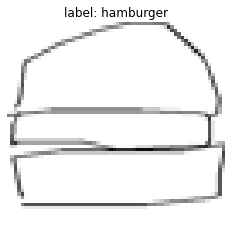

In [217]:
for images, labels in train_dataset.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
  
image_data = numpy_images[0].astype("uint8")
label_data = numpy_labels[0]
plt.axis("off")
plt.title("label: " + train_dataset.class_names[label_data])
plt.imshow(image_data, cmap='gray', vmin=0, vmax=255)

# print("Image shape:", image_data.shape)
# print("Image Numpy Shape:", numpy_images[0].shape)

# loaded_model.predict(image_data)
# loaded_model.predict(numpy_images[0])

reshaped_image = np.resize(image_data,(1, 64, 64, 1))
test_predictions = loaded_model.predict(reshaped_image)
result_index = np.argmax(test_predictions)
result_label = train_dataset.class_names[result_index]
print("Prediction:", result_label)

### Uploading a custom file

Saving hamburger_berat.png to hamburger_berat.png
What is this doodle represents? hamburger


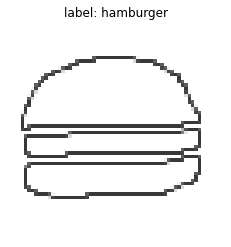

In [218]:
# !mkdir -p /content/uploads
# %cd '/content/myfolder'

from google.colab import files
uploaded_image = files.upload()
doodle_upload_file_name = list(uploaded_image.keys())[0]
uploaded_doodle_image = Image.open(doodle_upload_file_name)

# Converting the image to an array
uploaded_image_array = np.asarray(uploaded_doodle_image)
# print(uploaded_image_array)

# Getting the info
uplaoded_label = input("What is this doodle represents? ")

# Showing the image
plt.axis("off")
plt.title("label: " + uplaoded_label)
plt.imshow(uploaded_image_array, cmap='gray', vmin=0, vmax=255)

#### Making a prediction with the uploaded file

1/1 [==============================] - 0s 23ms/step
Prediction: hamburger


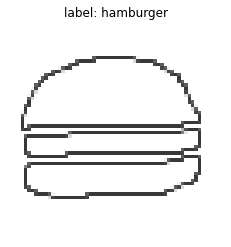

In [222]:
plt.axis("off")
plt.title("label: " + uplaoded_label)
plt.imshow(uploaded_image_array, cmap='gray', vmin=0, vmax=255)

reshaped_uploaded_image = np.resize(uploaded_image_array,(1, 64, 64, 1))

uploaded_predictions = loaded_model.predict(reshaped_uploaded_image)
uploaded_result_index = np.argmax(uploaded_predictions)
uploaded_result_label = train_dataset.class_names[result_index]
print("Prediction:", result_label)